In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
df=pd.read_csv(r'E:\Courses\data science\toplearn\Project\mes2.csv')
#df=df.set_index('Date')
df=df.tail(20)

In [3]:
#the 750.day's true value
actual_price=df.tail(1)
actual_price

,Date,Number,Volume,First,High,Low,Value,Last,Close
749,1400/03/31,7477,38880000,11390,11740,11290,4.700000e+11,11500,11551


In [4]:
#all days except last day is stored here
df =df.head(len(df)-1)
df

,Date,Number,Volume,First,High,Low,Value,Last,Close
730,1400/02/4,14485,74380000,11000,11590,10960,8.380000e+11,11170,11160
731,1400/02/5,10198,70370000,11010,11190,10930,7.710000e+11,10970,11160
732,1400/02/6,17295,107890000,11000,11610,11000,1.230000e+12,11610,11160
733,1400/02/7,15112,124360000,11870,12110,11660,1.500000e+12,12110,11160
734,1400/02/7,15112,124360000,11870,12110,11660,1.500000e+12,12110,11160
735,1400/02/8,17297,98350000,12240,12530,11830,1.200000e+12,12130,12210
736,1400/03/1,8021,93030000,11950,12100,11840,1.100000e+12,11840,11860
737,1400/03/17,12630,61830000,12590,12620,12210,7.690000e+11,12420,12440
738,1400/03/18,12539,72990000,12420,12680,12140,9.030000e+11,12190,12380
739,1400/03/19,7477,38880000,12100,12250,11960,4.700000e+11,12110,12090


In [5]:
days =list()
close_prices =list()

In [6]:
#getting only date and close prices
#df_days=df.loc[:, 'Date']
df_close=df.loc[:, 'Close']
#df_days

In [7]:
for d in range(len(df)):
    days.append([d])
for c in df_close:
    close_prices.append(float(c)) 

In [8]:
#show days and close prices
days 
#close_prices

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18]]

In [9]:
#3 models for prediction
#linear
lin_svr = SVR(kernel='linear', C= 1000.0)
lin_svr.fit(days, close_prices)
#poly
poly_svr = SVR(kernel='poly', C= 1000.0 , degree =2)
poly_svr.fit(days, close_prices)
#rbf
rbf_svr = SVR(kernel='rbf', C= 1000.0 , gamma=0.85)
rbf_svr.fit(days, close_prices)

E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

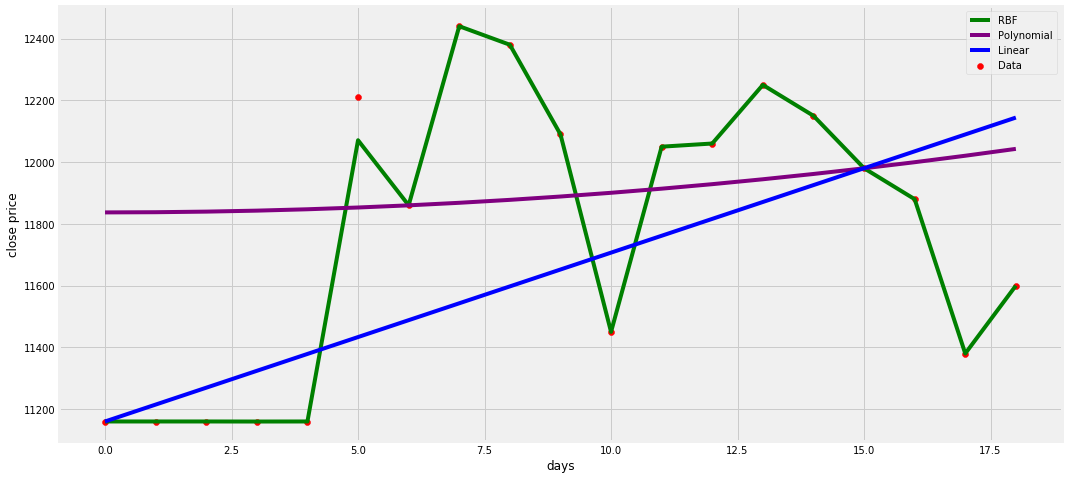

In [10]:
#plotting
plt.figure(figsize=(16,8))
plt.scatter(days, close_prices, color='red', label ='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF')
plt.plot(days, poly_svr.predict(days), color='purple', label='Polynomial')
plt.plot(days, lin_svr.predict(days), color='blue', label='Linear')
plt.xlabel('days')
plt.ylabel('close price')
plt.legend()
plt.show()

In [11]:
#predicted price for specific day
day=[[19]]
print('rbf predicts the price:',rbf_svr.predict(day))
print('poly predicts the price:',poly_svr.predict(day))
print('lin predicts the price:',lin_svr.predict(day))
actual_price


rbf predicts the price: [11762.97709949]
poly predicts the price: [12066.24920639]
lin predicts the price: [12198.76666667]


,Date,Number,Volume,First,High,Low,Value,Last,Close
749,1400/03/31,7477,38880000,11390,11740,11290,4.700000e+11,11500,11551
